# Principal Component Analysis

## Biplots with PCA

**Note:** For the 3D plots of this notebook blow, we will use an _interactive mode_ of matplotlib. You should be able to run everything smoothly after installing the package _ipympl_. You can install this package (if you are using conda/Anaconda) by the line 

`conda install -c conda-forge ipympl`

or by looking for the package `ipympl` in the GUI of Anaconda Navigator and its package search for your environment.

## Iris dataset

First we load the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=iris#sklearn.datasets.load_iris) which we are already familiar with.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We remember that the samples in this dataset contain **four** features:

In [3]:
print(iris.feature_names) 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


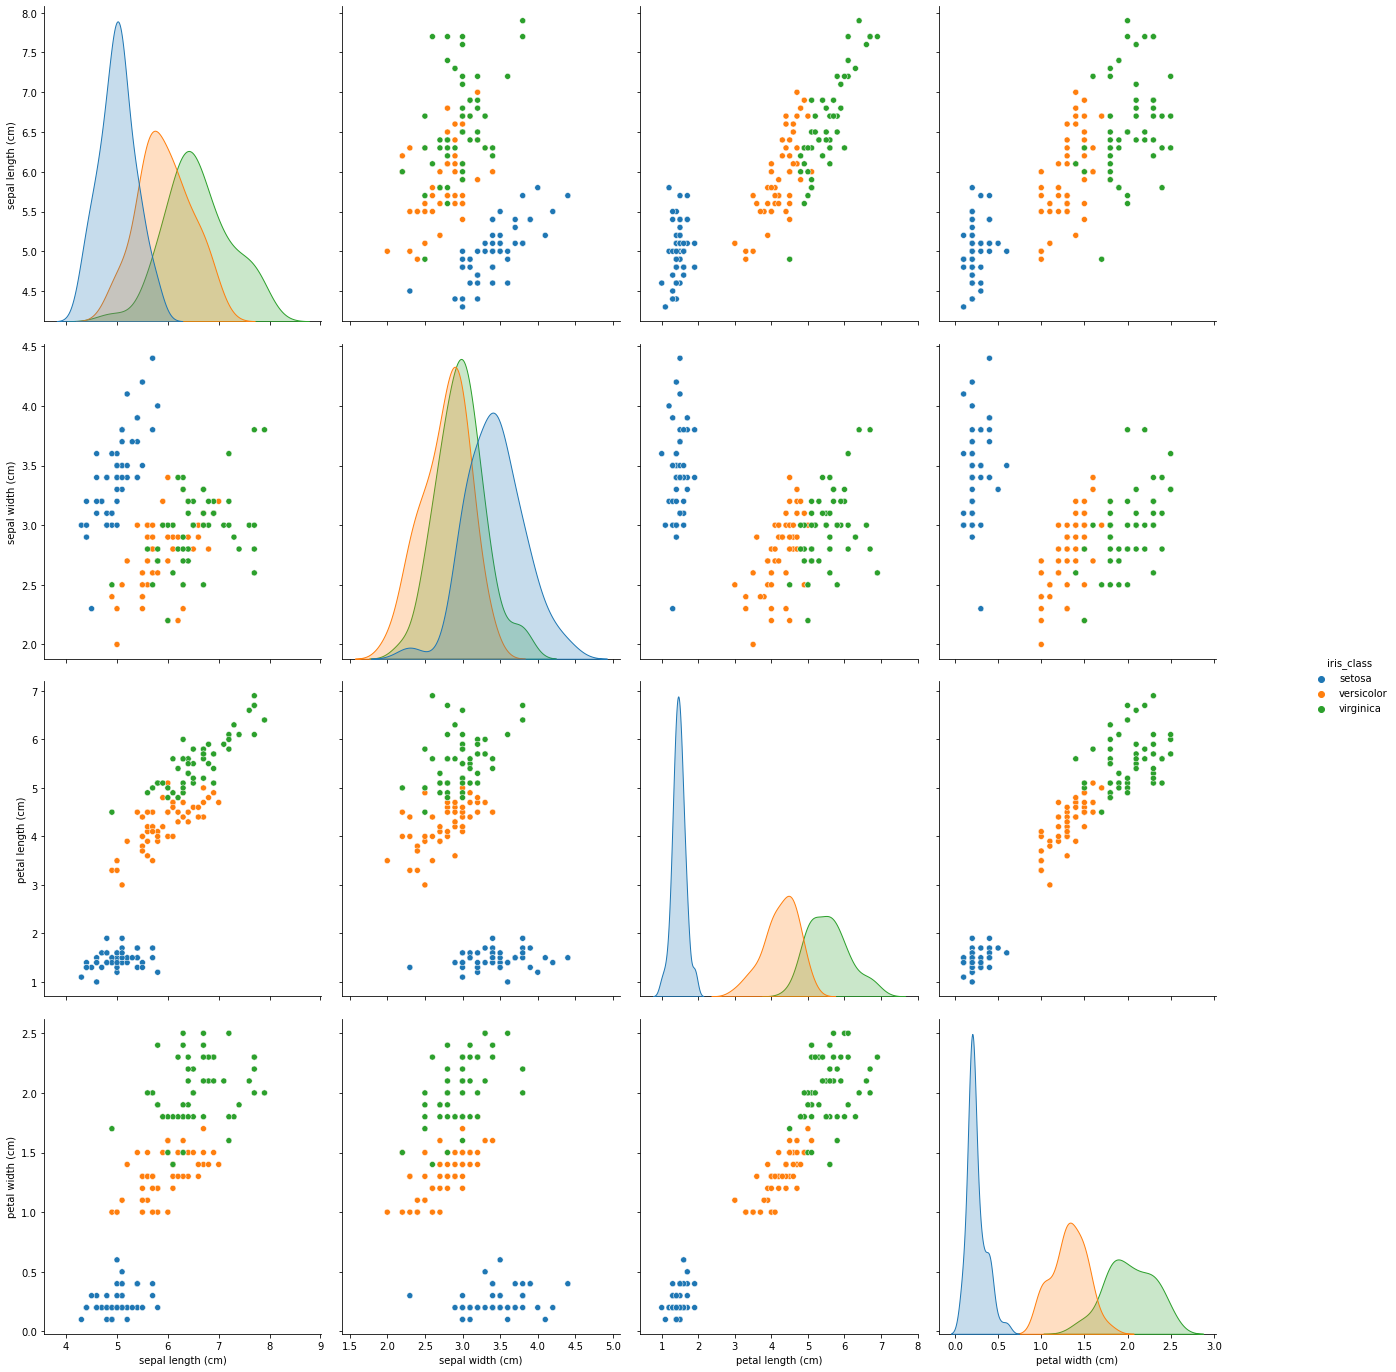

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# this is a small loop for creating a list with the category names 
iris.target_class = []
for k in range(len(iris.target)):
    iris.target_class.append(iris.target_names[iris.target[k]])

# for this, first create DataFrame
df_iris = pd.DataFrame(iris.data,columns=iris['feature_names'])
df_iris = df_iris.assign(iris_class=iris.target_class)
sns.pairplot(df_iris, hue= "iris_class", palette="tab10", )
fig = plt.gcf()
fig.set_size_inches(20, 20)

These are the pairwise scatter plot we created previously.

Is there a better way to visualize the data, without the need of all these pairwise plots? 
Our brain typially is able to visualize at most 3 dimensions well...

Let's use PCA with two principal components.

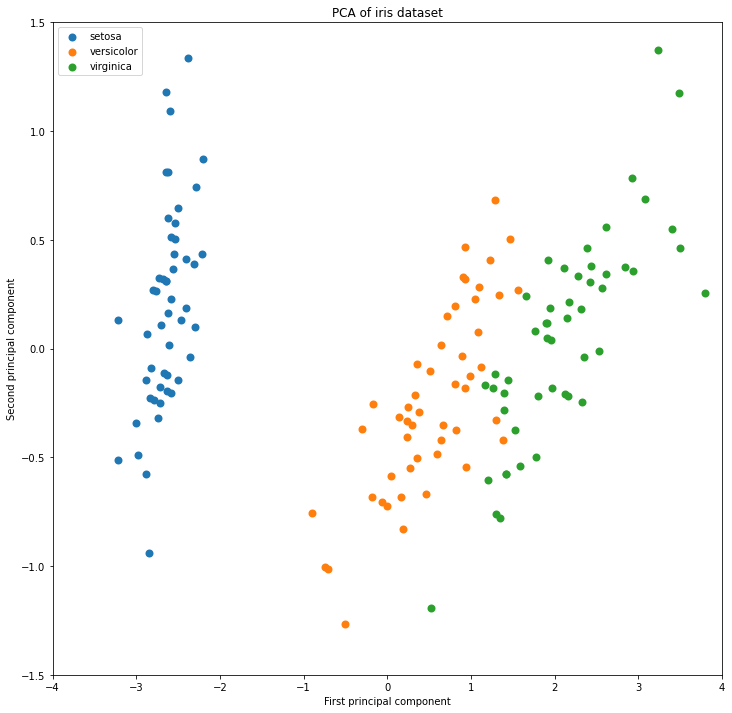

In [5]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(12, 12))
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                cmap='tab10', lw=2, label=target_name)
plt.title("PCA of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis([-4, 4, -1.5, 1.5])
plt.xlabel('First principal component') 
plt.ylabel('Second principal component')

plt.show()

This looks visually not very different from some of the scatter plots above, but it **is** conceptually different: In one plot 2D, we are able to "summarize" all four features.

Let's repeat PCA for **three** principal components.

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


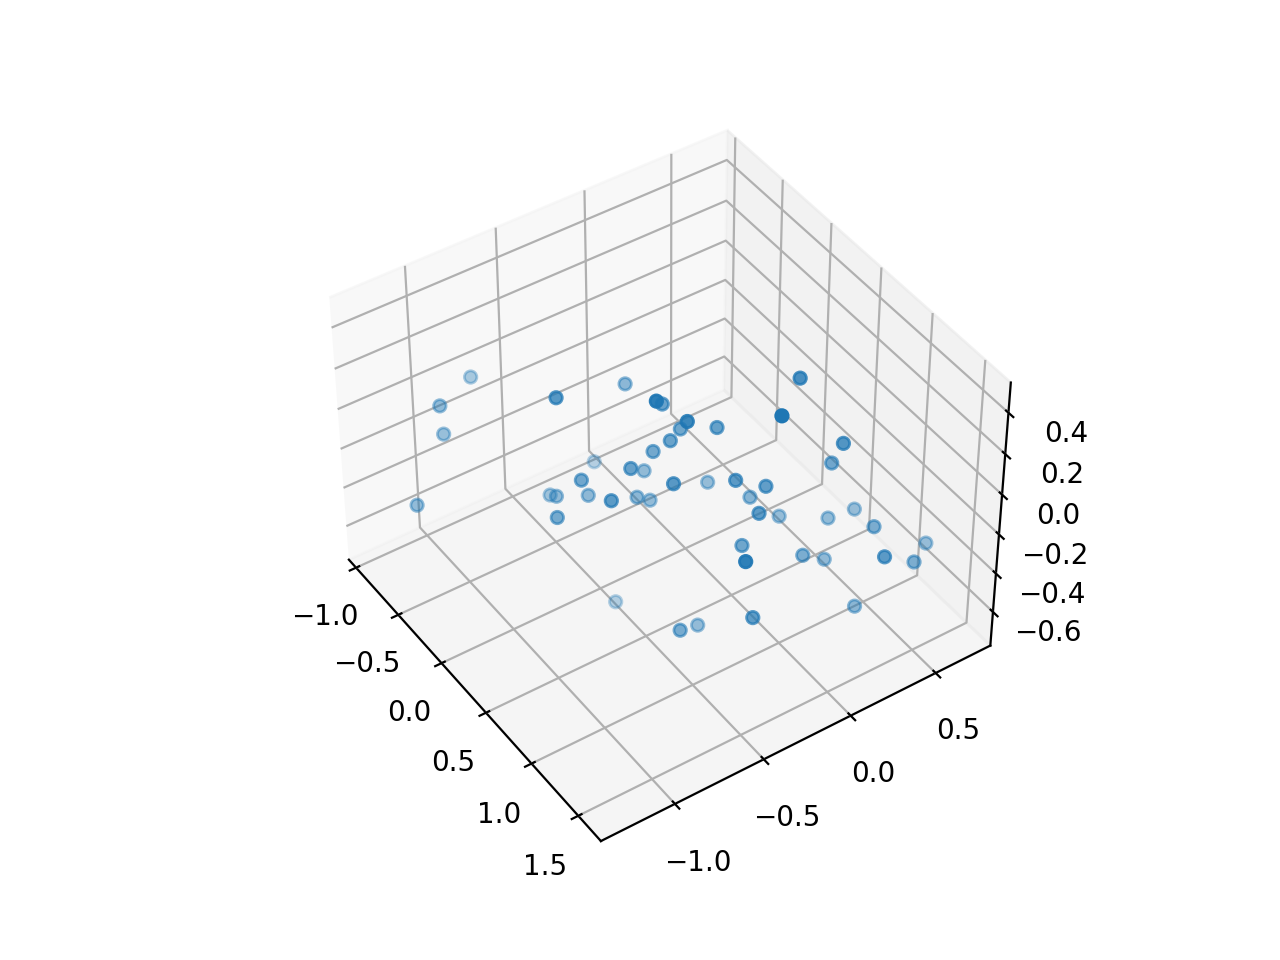

In [7]:
from mpl_toolkits.mplot3d import Axes3D
n_components = 3

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_pca[y == 1, 0],X_pca[y == 1, 1],X_pca[y == 1, 2])
plt.show()

In [ ]:
%matplotlib inline

<IPython.core.display.Javascript object>


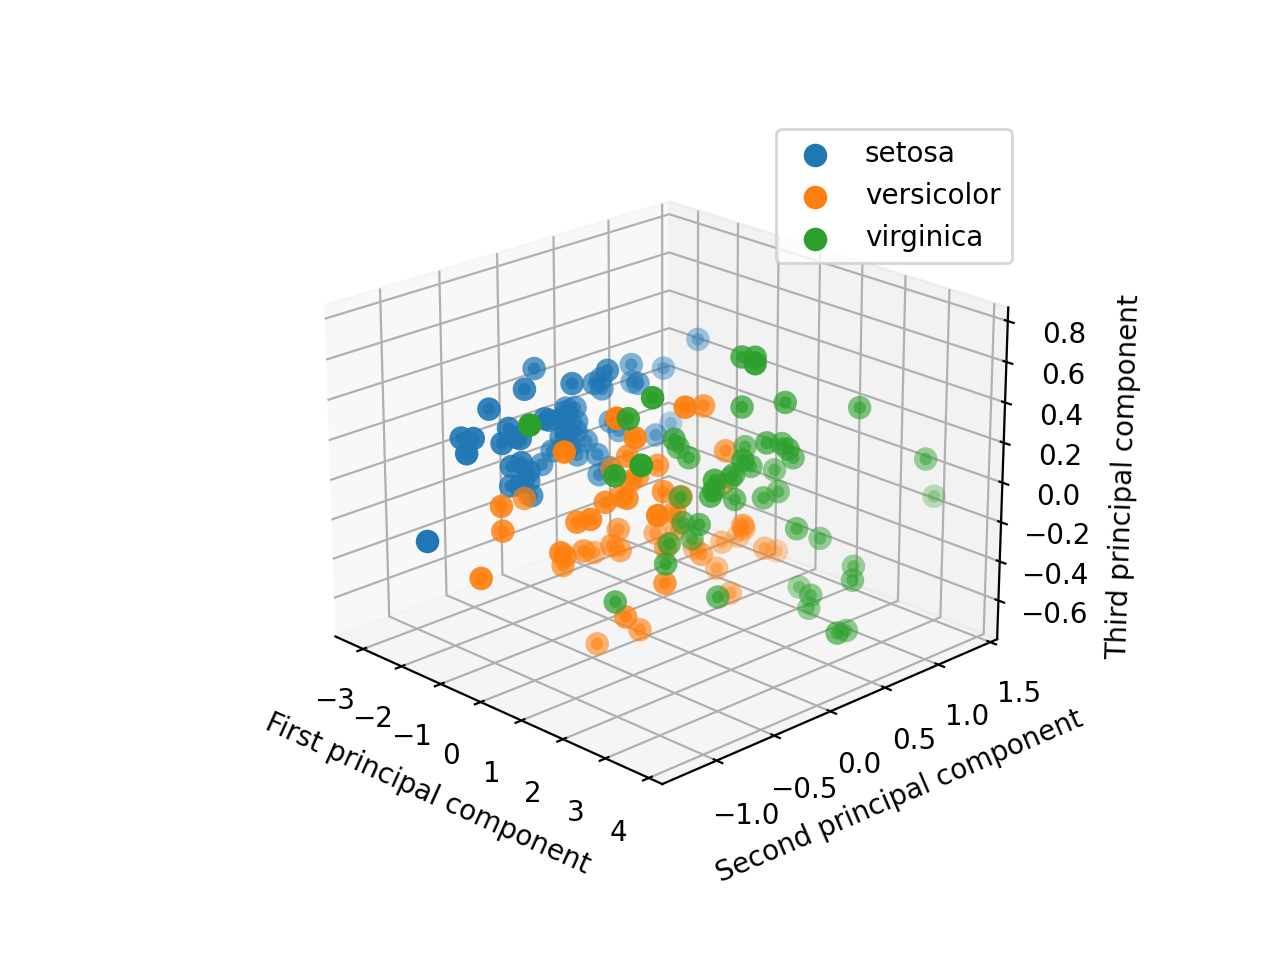

In [8]:
from mpl_toolkits.mplot3d import Axes3D
n_components = 3

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
fig = plt.figure() #(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for i, target_name in zip([0, 1, 2], iris.target_names):
    ax.scatter3D(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2],cmap='tab10', 
                 lw=4,label=target_name,marker="o",edgecolors='face')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

This now gives a more flexible visualization that summarizes basically all the information we have available in one plot.

How much of the total variance of the data set is explained by the three first principal components? 

In [9]:
vars(pca)

{'n_components': 3,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'n_features_in_': 4,
 '_fit_svd_solver': 'full',
 'mean_': array([5.84333333, 3.05733333, 3.758     , 1.19933333]),
 'noise_variance_': 0.023835092973449434,
 'n_samples_': 150,
 'n_features_': 4,
 'components_': array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
        [-0.58202985,  0.59791083,  0.07623608,  0.54583143]]),
 'n_components_': 3,
 'explained_variance_': array([4.22824171, 0.24267075, 0.0782095 ]),
 'explained_variance_ratio_': array([0.92461872, 0.05306648, 0.01710261]),
 'singular_values_': array([25.09996044,  6.01314738,  3.41368064])}

In [10]:
print("Variance explained by each of the first three PCs:")
pca.explained_variance_

Variance explained by each of the first three PCs:


array([4.22824171, 0.24267075, 0.0782095 ])

The ratio of the variance explained by the first three PCs can be calculated as 
$$
\frac{\sum_{i=1}^3 \lambda_i}{\sum_{i=1}^4 \lambda_i},
$$
amounts to:

In [11]:
np.sum(pca.explained_variance_ratio_)

0.9947878161267247

This is more than 99%, which means that the information lost by the projection from four to three dimensions is probably negligible.

Let's squeeze out some more information from what we have done. In order to understand better how the four different features are behaved, we create a so-called [biplot](https://en.wikipedia.org/wiki/Biplot).

<IPython.core.display.Javascript object>


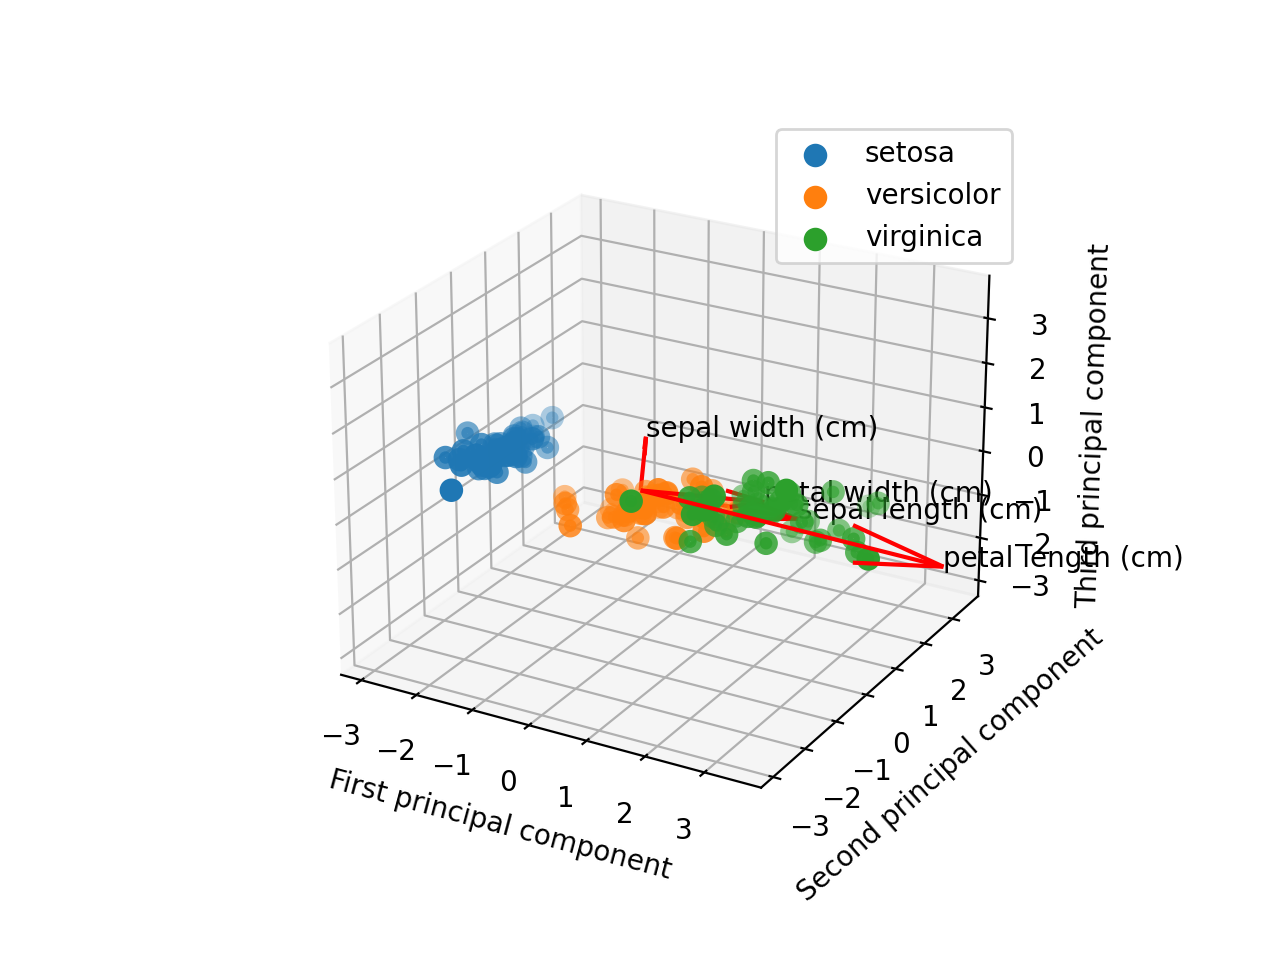

In [12]:
# Create biplot
V = pca.components_

fig = plt.figure() #(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
mx = np.max(X_pca)
mn = np.min(X_pca)
for i, target_name in zip([0, 1, 2], iris.target_names):
    ax.scatter3D(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2],cmap='tab10', 
                 lw=4,label=target_name,marker="o",edgecolors='face')
scaling_fac = 3
for i in range(0,4):
    Q = ax.quiver(0,0,0,np.dot(scaling_fac*np.sqrt(pca.explained_variance_[0]),V[0,i]),
               scaling_fac*np.dot(np.sqrt(pca.explained_variance_[1]),V[1,i]),
               scaling_fac*np.dot(np.sqrt(pca.explained_variance_[2]),V[2,i]),color='red')
    ax.text(np.dot(scaling_fac*np.sqrt(pca.explained_variance_[0]),V[0,i]),
           np.dot(scaling_fac*np.sqrt(pca.explained_variance_[1]),V[1,i]),
           np.dot(scaling_fac*np.sqrt(pca.explained_variance_[2]),V[2,i]),iris.feature_names[i])
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
ax.set_xlim(mn, mx)
ax.set_ylim(mn, mx)
ax.set_zlim(mn, mx)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

We note that we rescaled the axes compared to the 3d scatter plot above in order to better visualize the different magnitude of the principal components.

From the quiver plot of the loading vectors, we can conclude that the feature 'sepal width' is quite uncorrelated with the other three features. This is due to the approximate orthogonality that we observe the corresponding loading vectors, while the other three have quite large scalar products /small angles with each other.